In [3]:
#set up the environment
%pip install alpha_vantage pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
#import personal API key
%pip install python-dotenv


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
#import the libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Alpha Vantage Personal API Key
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the API key
api_key = os.getenv('ALPHA_VANTAGE_API_KEY')

In [7]:
# Initialize the TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch daily stock data for AMD (any symbol works!)
data, meta_data = ts.get_daily(symbol='AMD', outputsize='full')

# Display the first few rows of the dataset
data.head()


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-12-27,124.37,126.1800,122.26,125.19,32924011.0
2024-12-26,125.52,127.2999,125.05,125.06,25139138.0
2024-12-24,127.51,127.5100,124.66,126.29,24829564.0
2024-12-23,120.71,126.3387,120.47,124.60,47777898.0
2024-12-20,118.00,121.8600,117.90,119.21,53591212.0


In [8]:
# Save AMD stock data to a CSV file
data.to_csv('AMD_stock_data.csv')


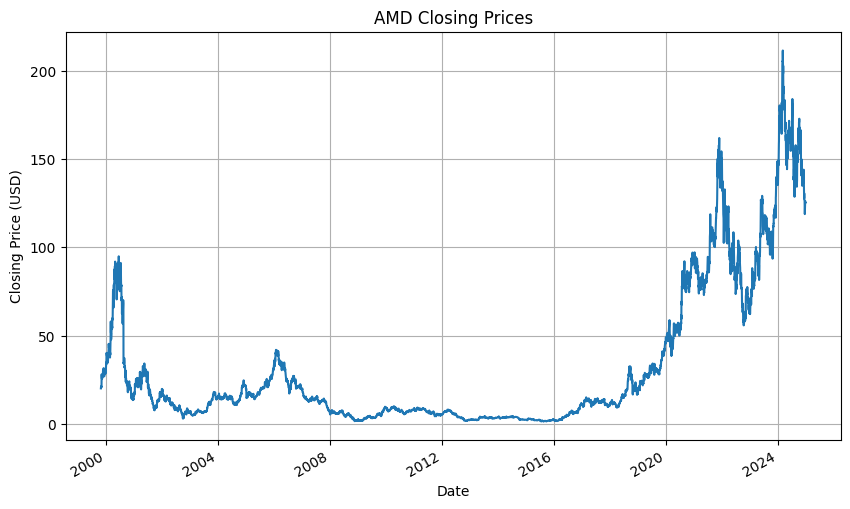

In [9]:
# Plot the closing prices for AMD
data['4. close'].plot(title='AMD Closing Prices', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()


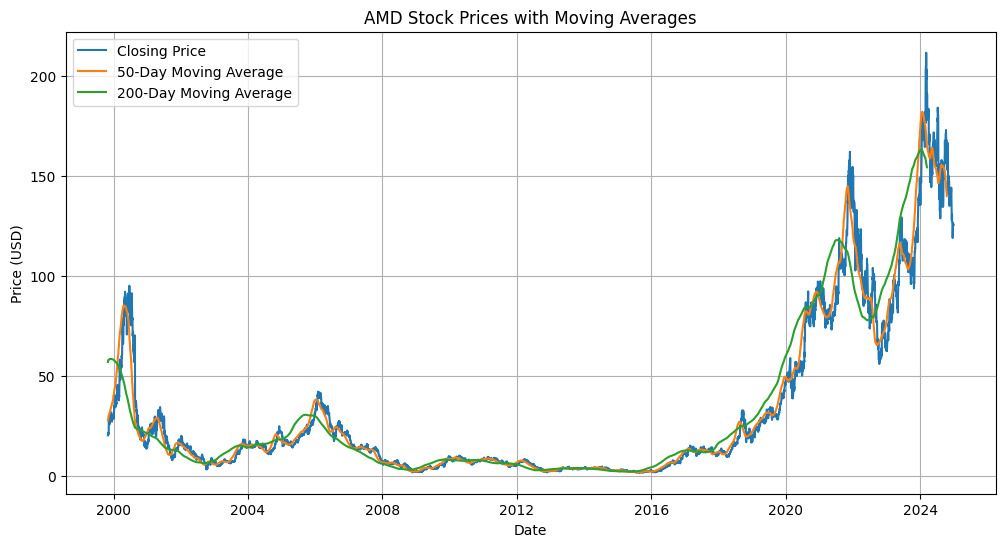

In [11]:
# Calculate moving averages
data['50_day_MA'] = data['4. close'].rolling(window=50).mean()
data['200_day_MA'] = data['4. close'].rolling(window=200).mean()

# Plot the stock data with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['4. close'], label='Closing Price')
plt.plot(data['50_day_MA'], label='50-Day Moving Average')
plt.plot(data['200_day_MA'], label='200-Day Moving Average')
plt.title('AMD Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
